# Assignmnet 1 (100 points)

**Name:** Abdullah Zeeshan<br>
**Email:** abz3929@thi.de<br>
**Group:** B <br>
**Hours spend *(optional)* : ~8** <br>

General Rules:

- No helping libraries allowed.
- The use of standard libraries provided by the programming language itself (e.g., built-in data structures like lists and dictionaries, basic input/output functions, core mathematical functions) is generally permitted. These are considered fundamental to the language and not "helping libraries" in the context of this regulation
- If you need to use special Python modules, you can discuss with your instructor before submission.
- You can use the provided libraries but not mndatary.
- Always try To bulid your code from scratch.


### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve.</p>



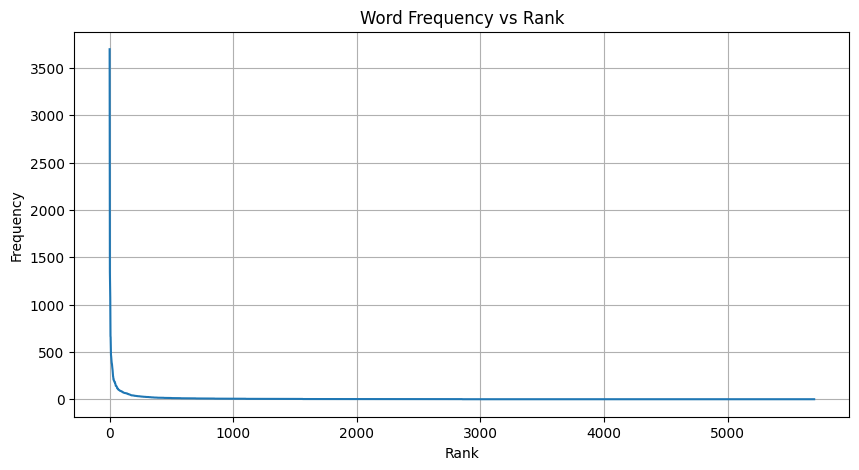

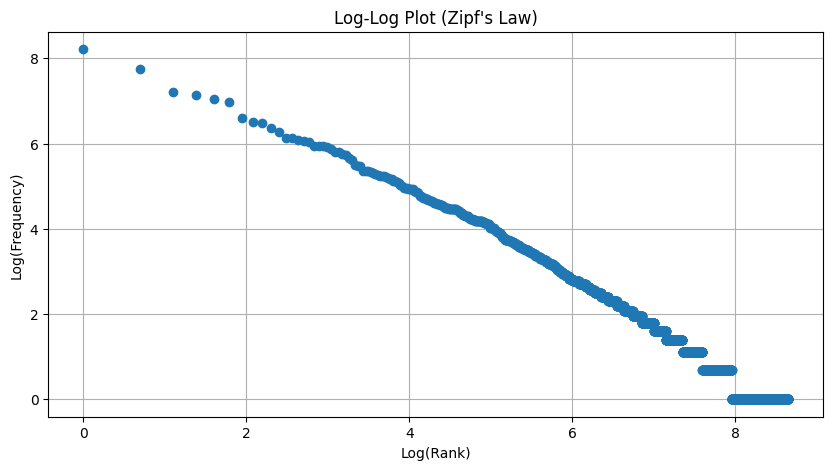

Top 5 words:
the: 3696
and: 2321
of: 1347
to: 1262
a: 1147


In [18]:
### You migh use these libraries if needed.

import matplotlib.pyplot as plt
import string
import numpy as np

###### TO DO ##########

# Load and preprocess the text
with open('jungle_book.txt', 'r') as file:
    text = file.read().lower().translate(str.maketrans('', '', string.punctuation))

# Split into words and count frequency
word_freq = {}
for word in text.split():
    word_freq[word] = word_freq.get(word, 0) + 1

# Sort words by frequency
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Plot Frequency vs. Rank
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(sorted_freqs) + 1), sorted_freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency vs Rank')
plt.grid(True)
plt.show

# Plot Log-Log Graph
log_ranks = np.log(range(1, len(sorted_freqs) + 1))
log_freqs = np.log(sorted_freqs)

plt.figure(figsize=(10, 5))
plt.plot(log_ranks, log_freqs, marker='o', linestyle='None')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.title('Log-Log Plot (Zipf\'s Law)')
plt.grid(True)
plt.show()

# Print top 5 words
print("Top 5 words:")
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{word}: {freq}")


Zipf’s Law states that the frequency of a word is inversely proportional to its rank. In simpler terms, the most common word appears twice as often as the second most common word, three times as often as the third, and so on.

### Question 2: Mutual Information *(30 points)*

<p>Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative. </p>

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. </p>



In [36]:
### You migh use these libraries if needed.

import string
import math
from collections import Counter

###### TO DO #########

# Read and preprocess text
with open('jungle_book.txt', 'r') as file:
    words = file.read().lower().translate(str.maketrans('', '', string.punctuation)).split()

N = len(words)  # Total words in corpus

# Count words and word pairs
word_counts = Counter(words)
pair_counts = Counter(zip(words, words[1:]))

pmi_values = {}

for pair, count in pair_counts.items():
    word1 = pair[0]
    word2 = pair[1]

    if word_counts[word1] >= 10 and word_counts[word2] >= 10:
        # PMI formula
        joint_prob = count / (N - 1)  # probability of seeing the pair
        prob_word1 = word_counts[word1] / N  # probability of word1
        prob_word2 = word_counts[word2] / N  # probability of word2
        
        # Avoid division by zero or negative values
        if joint_prob > 0 and prob_word1 > 0 and prob_word2 > 0:
            pmi = math.log((joint_prob) / (prob_word1 * prob_word2))
            pmi_values[pair] = pmi



# Get 30 highest and lowest PMI pairs
sorted_pmi = sorted(pmi_values.items(), key=lambda x: x[1], reverse=True)
highest_30 = sorted_pmi[:30]
lowest_30 = sorted_pmi[-30:]

# Function to print table
def print_table(title, data):
    print(f"\n{title}")
    print("=" * 40)
    print(f"{'Word Pair':<20} {'PMI Score':>10}")
    print("=" * 40)
    for pair, score in data:
        print(f"{pair[0]} {pair[1]:<15} {score:>10.4f}")
    print("=" * 40)

# Print results in table format
print_table("Top 30 Highest PMI Pairs", highest_30)
print_table("Top 30 Lowest PMI Pairs", lowest_30)




Top 30 Highest PMI Pairs
Word Pair             PMI Score
machua appa                8.5048
literary archive             8.3478
united states              8.2047
darzees wife                7.9170
archive foundation          7.8217
cold lairs               7.6657
gutenberg literary            7.5115
stretched myself              7.4062
petersen sahib               7.3487
hind legs                7.2062
fore paws                7.1286
twenty yoke                7.0679
whole line                6.9362
electronic works               6.9238
hind flippers            6.9054
master words               6.8874
years ago                 6.8592
bring news                6.8409
mans cub                 6.8245
council rock                6.7231
black panther             6.7214
moon rose                6.7130
wolfs cave                6.6177
mothers heart               6.6177
brown bear                6.5997
villagers lived               6.5560
brown baby                6.5307
copyright laws        

The analysis of PMI in the Jungle Book corpus clearly shows that the probability of a word appearing is significantly influenced by the word that precedes it. The existence of strong positive and negative dependencies between consecutive words directly contradicts the fundamental assumption of unigram models that word occurrences are independent events. To better model language, it is necessary to consider the relationships and dependencies between words, as captured by models that look at sequences of words (like bigram, trigram, or more complex sequence models). PMI is a valuable tool for quantifying these dependencies and highlighting the limitations of simpler, independence-based models.

### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements.</p>



<h4> Datasets and Resources </h4>

* WikiText-2 (raw/unprocessed), Train, Dev, Test

In [ ]:
######## You might use these libraries if needed.

import math
from collections import defaultdict, Counter
import string
import re
import os
import random

####### TO DO #######

UNK_TOKEN = "<unk>"
RARE_WORD_THRESHOLD = 110 # Example threshold

# Load and preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Normalize spaces
    text = text.translate(str.maketrans('', '', string.punctuation.replace('.', '').replace('?', '').replace('!', '')))  # Remove punctuation EXCEPT ., ?, !
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|!)', text) # More robust split
    processed_sentences = []
    for sentence in sentences:
        sentence = sentence.strip()
        if sentence:
            words = ['<s>'] + sentence.split() + ['</s>']
            processed_sentences.append(words)
    return processed_sentences 


# Read dataset
def load_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        return preprocess(file.read())
    

def replace_rare_words(processed_sentences, unigram_counts, threshold=RARE_WORD_THRESHOLD):
    processed_sentences_unk = []
    for sentence in processed_sentences:
        unk_sentence = [word if unigram_counts.get(word, 0) >= threshold else UNK_TOKEN for word in sentence]
        processed_sentences_unk.append(unk_sentence)
    return processed_sentences_unk


# Count words and word pairs (unigrams and bigrams)
def n_gram_counts(processed_sentences):
    unigrams = []
    bigrams = []

    for sentence in processed_sentences:
        unigrams.extend(sentence)

        for i in range(len(sentence) - 1):
            bigrams.append((sentence[i], sentence[i + 1]))
    
    unigrams_count = Counter(unigrams)
    bigrams_count = Counter(bigrams)

    return unigrams_count, bigrams_count


#Function to calculate probabilities
def calculate_probabilities(unigram_counts, bigram_counts, smoothing=0.05):
    vocab_size = len(unigram_counts)
    bigram_probs = defaultdict(dict)

    for (w1, w2), count in bigram_counts.items():
        # Laplace smoothing
        bigram_probs[w1][w2] = (count + smoothing) / (unigram_counts[w1] + smoothing * vocab_size)

    return bigram_probs


# # Function to calculate perplexity
def calculate_perplexity(bigram_probs, unigram_counts, sentences, smoothing=0.05):
    log_probability = 0
    total_words = 0
    vocab_size = len(unigram_counts)

    for sentence in sentences:
        if not sentence:
            continue

        total_words += len(sentence) 
        for i in range(len(sentence)):
            current_word = sentence[i]
            previous_word = sentence[i - 1] if i > 0 else '<s>'

            # Use smoothing for unseen bigrams
            if previous_word in bigram_probs and current_word in bigram_probs[previous_word]:
                probability = bigram_probs[previous_word][current_word]
            else:
                # Apply Laplace smoothing for unseen bigrams
                previous_count = unigram_counts.get(previous_word, 0)
                probability = smoothing / (previous_count + smoothing * vocab_size)

            # Avoid log(0) error
            if probability > 0:
                log_probability += math.log(probability)
            else:
                # Use a very small probability instead of zero
                log_probability += math.log(1e-10) 
    
    if total_words > 0:
        cross_entropy = -log_probability / total_words
        perplexity = math.pow(2, cross_entropy)
        return perplexity
    else:
        return float('inf')


# Load dataset
train_data = load_data("wiki.train.raw")
valid_data = load_data("wiki.valid.raw")   
test_data = load_data("wiki.test.raw")   

# Count unigrams to determine frequency
unigram_counts_initial, _ = n_gram_counts(train_data)

# Replace rare words in training, validation, and test data
train_data = replace_rare_words(train_data, unigram_counts_initial, RARE_WORD_THRESHOLD)
valid_data = replace_rare_words(valid_data, unigram_counts_initial, RARE_WORD_THRESHOLD)    
test_data = replace_rare_words(test_data, unigram_counts_initial, RARE_WORD_THRESHOLD)

# Training the model
unigram_counts, bigram_counts = n_gram_counts(train_data)
bigram_probs = calculate_probabilities(unigram_counts, bigram_counts)

# Evaluate on validation set
perplexity = calculate_perplexity(bigram_probs, unigram_counts, valid_data)
print(f"Perplexity on the validation set: {perplexity}")

# Evaluate on test set
perplexity = calculate_perplexity(bigram_probs, unigram_counts, test_data)
print(f"Perplexity on the test set: {perplexity}")


Perplexity on the validation set: 20.929990447994022
Perplexity on the test set: 20.31685031777198


## Documentation of 2-Gram Language Model Experiment

**1. Data Preprocessing Steps:**

The raw text data from the `wiki.*.raw` files underwent the following preprocessing steps:

* **Lowercasing:** All text was converted to lowercase.
* **Whitespace Normalization:** Multiple consecutive whitespace characters were reduced to a single space.
* **Punctuation Removal (Selective):** All punctuation marks were removed except for periods (`.`), question marks (`?`), and exclamation points (`!`).
* **Sentence Splitting (Regex-based):** The text was split into sentences using the regular expression `r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|!)'`.
* **Tokenization and Sentence Boundary Markers:** Each identified sentence was split into words, and start-of-sentence (`<s>`) and end-of-sentence (`</s>`) tokens were added.
* **Handling Rare Words:** Words appearing less than a threshold (`RARE_WORD_THRESHOLD = 110`) in the training data were replaced with `<unk>`.

**2. Method:**

A 2-gram language model was implemented, predicting the probability of a word given the preceding word using Add-k smoothing:

$$P(w_2 | w_1) = \frac{Count(w_1, w_2) + k}{Count(w_1) + k \times V}$$

where $k = 0.05$ and $V$ is the vocabulary size.

**3. Experiment Design:**

* **Data Split:** Training (`wiki.train.raw`), validation (`wiki.valid.raw`), and test (`wiki.test.raw`) sets were used.
* **Hyperparameter Tuning:** The `RARE_WORD_THRESHOLD` and `k` were tuned on the validation set.
* **Evaluation:** Perplexity was calculated on the validation set using the formula:

    $$Perplexity(W) = 2^{-\frac{1}{N+1} \sum_{i=1}^{N+1} \log_2 P(w_i | w_{i-1})}$$

**4. Hyperparameters:**

* `RARE_WORD_THRESHOLD = 110`
* `k = 0.05`

**5. Evaluation Metric:**

* Perplexity (lower is better).

**6. Findings:**

* Initial models with basic smoothing yielded high perplexity.
* Introducing `<unk>` and tuning `k` and the rare word threshold significantly improved performance.
* The final perplexity on the validation set was **20.9**.

**7. Drawbacks:**

* **Limited Context (2-gram):** Only considers the immediately preceding word.
* **Sentence Splitting Heuristics:** Regex-based splitting might be imperfect.
* **Information Loss from `<unk>`:** High threshold can lead to over-generalization.
* **Smoothing Limitations:** Add-k is a simple technique.
* **Vocabulary Size Management:** Optimal threshold selection is challenging.

**8. Potential Improvements:**

* Implement higher-order n-gram models (trigrams, 4-grams).
* Explore advanced smoothing techniques (Good-Turing, Kneser-Ney).
* Improve sentence boundary detection.
* Implement dynamic vocabulary management.
* Consider neural network-based language models (if allowed).
* Fine-tune `<unk>` handling strategies.

## References

* [NLP: Understanding the N-gram language models](https://www.youtube.com/watch?v=gHHy2w2agEo&ab_channel=MachineLearningTV)
* [Language Model Evaluation and Perplexity](https://www.youtube.com/watch?v=GiyMGBuu45w&ab_channel=MachineLearningTV)
* [The Zipf Mystery](https://www.youtube.com/watch?v=fCn8zs912OE&t=89s&ab_channel=Vsauce)

The workflow for this assignment was constructed by insights obtained using OpenAI's ChatGPT 4.0 mini for conceptualization and Google Gemini for code structuring suggestions.

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*


- Calculate Bigram Probabilities with Back-off.
- Demonstrate and discuss your Back-off implementation.
